In [197]:
import atoti as tt

In [198]:
session = tt.Session(
    user_content_storage=".content",
    port=9095,
    java_options=["-Xms1G", "-Xmx10G"]
)

Closing existing "Unnamed" session to create the new one.


In [199]:
db_name = "Olympic"
db_user = "postgres"
db_password = "postgres"  
db_host = "localhost"  
db_port = "5432"

In [200]:
jdbc_url = f"jdbc:postgresql://{db_host}:{db_port}/{db_name}?user={db_user}&password={db_password}"

In [201]:
jdbc_url

'jdbc:postgresql://localhost:5432/Olympic?user=postgres&password=postgres'

In [202]:
facttest = session.read_sql(
    "SELECT * FROM factolympic",
    keys=["year","country"],
    table_name="factTable",
    url=jdbc_url,
)

In [203]:
facttest.head()

bronze  silver  gold  total  depression  schizophrenia  \
year country                                                             
2018 China           2       7     1     10    419.2856      202.93486   
     Indonesia       0       0     0      0   343.55807      188.28181   
     Venezuela       0       0     0      0    567.8035      178.34537   
     Peru            0       0     0      0   353.81754      179.93779   
     Niger           0       0     0      0   726.03235      133.28583   

                   bipolar  eatingdisorder    anxiety  
year country                                           
2018 China       39.638176       24.338549  310.26324  
     Indonesia    71.28629       23.671894  338.28217  
     Venezuela     180.265       46.752934  383.29855  
     Peru        200.16165        62.59088   532.4991  
     Niger      117.636185       16.902071  285.88818

In [176]:
# medals = session.read_sql(
#     "SELECT * FROM medalsnew",
#     keys=["id"],
#     table_name="Medals",
#     url=jdbc_url)

In [204]:
countries = session.read_sql(
    "SELECT * FROM countries",
    keys=["country"],
    table_name="Countries",
    url=jdbc_url)

In [205]:
economic = session.read_sql(
    "SELECT * FROM economic",
    keys=["country"],
    table_name="Economic",
    url=jdbc_url)

In [206]:
time = session.read_sql(
    "SELECT * FROM time",
    keys=["year"],
    table_name="Time",
    url=jdbc_url)

In [207]:
lifeexp = session.read_sql(
    "SELECT * FROM lifeexp",
    keys=["year","country"],
    table_name="LifeExp",
    url=jdbc_url)

In [208]:
facttest.join(countries, facttest["country"] == countries["country"])

In [182]:
facttest.join(economic, facttest["year"] == economic["year"])

In [209]:
facttest.join(time, facttest["year"] == time["year"])

In [184]:
facttest.join(lifeexp, (facttest["year"] == lifeexp["year"] )& (facttest["country"] == lifeexp["country"]))

In [210]:
session.tables.schema

```mermaid
erDiagram
  "Economic" {
    nullable int "year"
    _ String "yearcode"
    _ String PK "country"
    _ String "code"
    nullable double "poverty"
    nullable double "gdpcap"
    nullable double "gdpgrowth"
    nullable double "intsrv"
    nullable double "mort"
    nullable double "hlthexp"
    nullable double "govhlthcap"
    nullable double "prvhlthcap"
    nullable double "exthlthcap"
  }
  "LifeExp" {
    _ String PK "country"
    _ String "code"
    _ int PK "year"
    nullable double "lifeexpectancy"
  }
  "Countries" {
    _ String PK "country"
    _ String "continent"
  }
  "Time" {
    _ int PK "year"
  }
  "factTable" {
    _ int PK "year"
    _ String PK "country"
    nullable int "bronze"
    nullable int "silver"
    nullable int "gold"
    nullable int "total"
    nullable double "depression"
    nullable double "schizophrenia"
    nullable double "bipolar"
    nullable double "eatingdisorder"
    nullable double "anxiety"
  }
  "factTable" }o--o| "Countries" : "`country` == `country`"
  "factTable" }o--o| "Time" : "`year` == `year`"
```


In [211]:
testcube = session.create_cube(facttest)

In [216]:
testcube

In [213]:
hierarchies, levels, measures = testcube.hierarchies, testcube.levels, testcube.measures

In [214]:
print(list(testcube.levels))

[('Countries', 'continent', 'continent'), ('factTable', 'year', 'year'), ('factTable', 'country', 'country')]


In [226]:
list(levels)

[('Countries', 'continent', 'continent'),
 ('factTable', 'year', 'year'),
 ('Continent', 'continent', 'continent'),
 ('Continent', 'continent', 'country'),
 ('factTable', 'country', 'country')]

In [241]:
del hierarchies["factTable","country"]

In [242]:
testcube.hierarchies

{('Time', 'year'): <atoti.hierarchy.Hierarchy object at 0x7bfef17e9660>, ('Continent', 'continent'): <atoti.hierarchy.Hierarchy object at 0x7bfef17ea680>}

In [118]:
testcube.hierarchies["Countries","country"]= [countries["country"]]

In [243]:
testcube.query(measures["bronze.SUM"],measures["silver.SUM"],measures["gold.SUM"],measures["depression.MEAN"], levels=[levels['Continent', 'continent', 'continent']])

,bronze.SUM,silver.SUM,gold.SUM,depression.MEAN
continent,,,,
Africa,96,91,70,800.73
Asia,594,526,555,607.14
Europe,"1,636","1,479","1,481",609.86
North America,524,522,555,618.71
Oceania,157,149,128,495.91
South America,89,56,49,616.67


In [136]:
testcube.query(measures["total.SUM"],measures["depression.MEAN"], levels = [levels["Countries",'country','country']])

,total.SUM,depression.MEAN
country,,
Afghanistan,2,891.18
Albania,0,381.48
Algeria,15,736.32
American Samoa,0,391.00
Andorra,0,621.74
...,...,...
Venezuela,7,566.37
Vietnam,4,372.64
Yemen,0,892.93


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
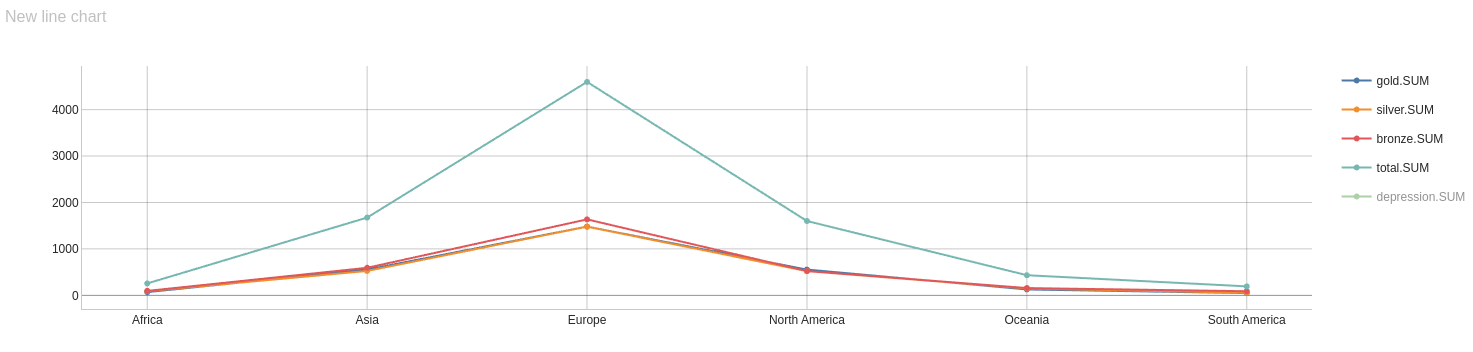

In [244]:
session.widget

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
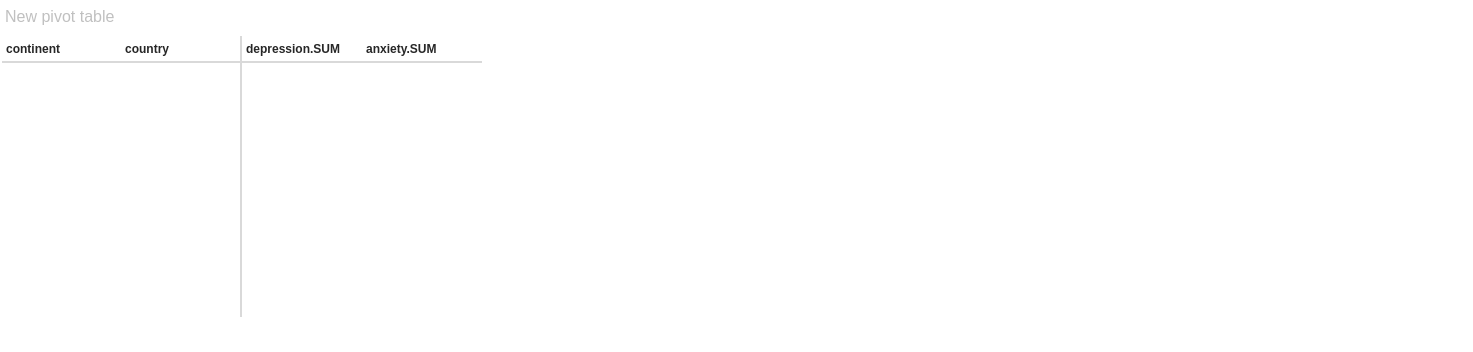

In [245]:
session.widget